Importing library files and data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Converting sex column to numeric representation taking male as 0 and female as 1

In [5]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [6]:
def labelFix(label):
    if(label == 'male'):
        return 0
    else:
        return 1

In [7]:
df['Sex'] = df['Sex'].apply(labelFix)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


Dropping all those fields which won't affect our predictions from our dataframe

In [9]:
df_test = df.drop('PassengerId', axis = 1)
df_test = df_test.drop('Survived', axis = 1)
df_test = df_test.drop('Name', axis = 1)
df_test = df_test.drop('Ticket', axis = 1)
df_test = df_test.drop('Fare', axis = 1)
df_test = df_test.drop('Cabin', axis = 1)

In [10]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.0,1,0,S
1,1,1,38.0,1,0,C
2,3,1,26.0,0,0,S
3,1,1,35.0,1,0,S
4,3,0,35.0,0,0,S


In [11]:
df_test = df_test.drop('SibSp', axis = 1)
df_test = df_test.drop('Parch', axis = 1)

Moving labels into another data frame

In [12]:
df_label = df['Survived']

In [13]:
df_label.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Converting Embarked column into numeric field

In [14]:
df_test['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
def emFix(label):
    if(label == 'S'):
        return 1
    elif(label == 'C'):
        return 2
    elif(label == 'Q'):
        return 3
    else:
        return 0

In [16]:
df_test['Embarked'] = df_test['Embarked'].apply(emFix)

In [17]:
df_test.head()

,Pclass,Sex,Age,Embarked
0,3,0,22.0,1
1,1,1,38.0,2
2,3,1,26.0,1
3,1,1,35.0,1
4,3,0,35.0,1


Data needs to be normalised

In [18]:
colNorm = ['Pclass', 'Embarked']

In [19]:
df_test[colNorm] = df_test[colNorm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

Creating feature columns

In [20]:
pclass = tf.feature_column.numeric_column('Pclass')
sex = tf.feature_column.numeric_column('Sex')
embarked = tf.feature_column.numeric_column('Embarked')
age = tf.feature_column.numeric_column('Age')

Converting age to bucketized column

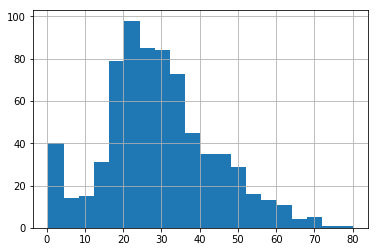

In [21]:
df['Age'].hist(bins=20)

In [22]:
ageBuckets = tf.feature_column.bucketized_column(age, [0,10,20,30,40,50,60,70,80])

Final feature columns to be used in our model

In [23]:
featCols = [pclass, sex, embarked, ageBuckets ]

Train test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_test, df_label, test_size=0.30, random_state=42)

Actual training

In [26]:
inputFunc = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [27]:
model = tf.estimator.LinearClassifier(featCols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/tw/_13r7f410y36n95b5pgwr2740000gn/T/tmpxnmce9gy', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a288232b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [28]:
model.train(input_fn=inputFunc, steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/tw/_13r7f410y36n95b5pgwr2740000gn/T/tmpxnmce9gy/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 222.131
INFO:tensorflow:loss = 5.3328667, step = 101 (0.451 sec)
INFO:tensorflow:global_step/sec: 153.521
INFO:tensorflow:loss = 4.80888, step = 201 (0.649 sec)
INFO:tensorflow:global_step/sec: 287.952
INFO:tensorflow:loss = 5.193981, step = 301 (0.348 sec)
INFO:tensorflow:global_step/sec: 365.841
INFO:tensorflow:loss = 4.4896364, step = 401 (0.273 sec)
INFO:tensorflow:global_step/sec: 403.183
INFO:tensorflow:loss = 5.87523, step = 501 (0.251 sec)
INFO:tensorflow:global_step/sec: 352.102
INFO:tensorflow:loss = 2.08063, step = 601 (0.284 sec)
INFO:tensorflow:globa

INFO:tensorflow:loss = 5.6967683, step = 8001 (0.389 sec)
INFO:tensorflow:global_step/sec: 270.38
INFO:tensorflow:loss = 3.8686702, step = 8101 (0.366 sec)
INFO:tensorflow:global_step/sec: 358.971
INFO:tensorflow:loss = 2.4993224, step = 8201 (0.282 sec)
INFO:tensorflow:global_step/sec: 330.274
INFO:tensorflow:loss = 7.174144, step = 8301 (0.301 sec)
INFO:tensorflow:global_step/sec: 329.726
INFO:tensorflow:loss = 3.964703, step = 8401 (0.304 sec)
INFO:tensorflow:global_step/sec: 309.29
INFO:tensorflow:loss = 5.6312857, step = 8501 (0.323 sec)
INFO:tensorflow:global_step/sec: 282.938
INFO:tensorflow:loss = 8.181503, step = 8601 (0.353 sec)
INFO:tensorflow:global_step/sec: 396.636
INFO:tensorflow:loss = 3.7231147, step = 8701 (0.254 sec)
INFO:tensorflow:global_step/sec: 353.675
INFO:tensorflow:loss = 4.133001, step = 8801 (0.284 sec)
INFO:tensorflow:global_step/sec: 362.089
INFO:tensorflow:loss = 4.0268297, step = 8901 (0.275 sec)
INFO:tensorflow:global_step/sec: 347.169
INFO:tensorflow:

In [29]:
testInputFunc = tf.estimator.inputs.pandas_input_fn(X_test, y_test, batch_size=10, num_epochs=1, shuffle=False)

In [30]:
results = model.evaluate(testInputFunc)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-31-18:14:36
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/tw/_13r7f410y36n95b5pgwr2740000gn/T/tmpxnmce9gy/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-08-31-18:14:37
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.8134328, accuracy_baseline = 0.5858209, auc = 0.8705457, auc_precision_recall = 0.8442499, average_loss = 0.44209895, global_step = 10000, label/mean = 0.41417912, loss = 4.3882413, precision = 0.8080808, prediction/mean = 0.3994904, recall = 0.7207207


In [31]:
results

{'accuracy': 0.8134328,
 'accuracy_baseline': 0.5858209,
 'auc': 0.8705457,
 'auc_precision_recall': 0.8442499,
 'average_loss': 0.44209895,
 'label/mean': 0.41417912,
 'loss': 4.3882413,
 'precision': 0.8080808,
 'prediction/mean': 0.3994904,
 'recall': 0.7207207,
 'global_step': 10000}

Now to make predictions through our model, we clean our test data first using same strategies as above

In [32]:
tdf = pd.read_csv("test.csv")

In [33]:
tdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
tdf['Sex'] = tdf['Sex'].apply(labelFix)

In [35]:
tdf_test = tdf.drop('PassengerId', axis = 1)
tdf_test = tdf_test.drop('Name', axis = 1)
tdf_test = tdf_test.drop('Ticket', axis = 1)
tdf_test = tdf_test.drop('Fare', axis = 1)
tdf_test = tdf_test.drop('Cabin', axis = 1)

In [36]:
tdf_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,34.5,0,0,Q
1,3,1,47.0,1,0,S
2,2,0,62.0,0,0,Q
3,3,0,27.0,0,0,S
4,3,1,22.0,1,1,S


In [37]:
tdf_test = tdf_test.drop('SibSp', axis = 1)
tdf_test = tdf_test.drop('Parch', axis = 1)

In [38]:
tdf_test['Embarked'] = tdf_test['Embarked'].apply(emFix)

In [39]:
col2norm = ['Pclass', 'Embarked']
tdf_test[col2norm] = tdf_test[col2norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [40]:
predfn = tf.estimator.inputs.pandas_input_fn(tdf_test, batch_size=len(tdf_test), shuffle=False)

In [41]:
preds = list(model.predict(predfn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/tw/_13r7f410y36n95b5pgwr2740000gn/T/tmpxnmce9gy/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


Convert predictions to a list

In [42]:
preds[0]

{'logits': array([-1.1015514], dtype=float32),
 'logistic': array([0.24944934], dtype=float32),
 'probabilities': array([0.7505507 , 0.24944934], dtype=float32),
 'class_ids': array([0]),
 'classes': array([b'0'], dtype=object)}

In [43]:
predics = list()
for i in range(len(preds)):
    predics.append(preds[i]['class_ids'][0])

In [44]:
predics

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,


In [45]:
list(tdf['PassengerId'])

[892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 901,
 902,
 903,
 904,
 905,
 906,
 907,
 908,
 909,
 910,
 911,
 912,
 913,
 914,
 915,
 916,
 917,
 918,
 919,
 920,
 921,
 922,
 923,
 924,
 925,
 926,
 927,
 928,
 929,
 930,
 931,
 932,
 933,
 934,
 935,
 936,
 937,
 938,
 939,
 940,
 941,
 942,
 943,
 944,
 945,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 966,
 967,
 968,
 969,
 970,
 971,
 972,
 973,
 974,
 975,
 976,
 977,
 978,
 979,
 980,
 981,
 982,
 983,
 984,
 985,
 986,
 987,
 988,
 989,
 990,
 991,
 992,
 993,
 994,
 995,
 996,
 997,
 998,
 999,
 1000,
 1001,
 1002,
 1003,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1015,
 1016,
 1017,
 1018,
 1019,
 1020,
 1021,
 1022,
 1023,
 1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1043,
 1044,
 1045,
 1046,
 1047,
 1048,
 1049,
 1

In [46]:
answer = zip(list(tdf['PassengerId']), predics)

In [47]:
anslist = list(answer)

In [48]:
anslist

[(892, 0),
 (893, 0),
 (894, 0),
 (895, 0),
 (896, 0),
 (897, 0),
 (898, 1),
 (899, 0),
 (900, 1),
 (901, 0),
 (902, 0),
 (903, 0),
 (904, 1),
 (905, 0),
 (906, 1),
 (907, 1),
 (908, 0),
 (909, 0),
 (910, 0),
 (911, 0),
 (912, 0),
 (913, 0),
 (914, 1),
 (915, 0),
 (916, 1),
 (917, 0),
 (918, 1),
 (919, 0),
 (920, 0),
 (921, 0),
 (922, 0),
 (923, 0),
 (924, 0),
 (925, 0),
 (926, 1),
 (927, 0),
 (928, 0),
 (929, 0),
 (930, 0),
 (931, 0),
 (932, 0),
 (933, 0),
 (934, 0),
 (935, 1),
 (936, 1),
 (937, 0),
 (938, 0),
 (939, 0),
 (940, 1),
 (941, 0),
 (942, 0),
 (943, 0),
 (944, 1),
 (945, 1),
 (946, 0),
 (947, 0),
 (948, 0),
 (949, 0),
 (950, 0),
 (951, 1),
 (952, 0),
 (953, 0),
 (954, 0),
 (955, 1),
 (956, 0),
 (957, 1),
 (958, 1),
 (959, 0),
 (960, 1),
 (961, 1),
 (962, 1),
 (963, 0),
 (964, 0),
 (965, 0),
 (966, 1),
 (967, 1),
 (968, 0),
 (969, 1),
 (970, 0),
 (971, 1),
 (972, 0),
 (973, 0),
 (974, 0),
 (975, 0),
 (976, 0),
 (977, 0),
 (978, 1),
 (979, 0),
 (980, 1),
 (981, 0),
 (982, 0),

Final answer

In [49]:
print("PassengerId,Survived")
for i in (anslist):
    print("{0},{1}".format(i[0],i[1]))

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1
901,0
902,0
903,0
904,1
905,0
906,1
907,1
908,0
909,0
910,0
911,0
912,0
913,0
914,1
915,0
916,1
917,0
918,1
919,0
920,0
921,0
922,0
923,0
924,0
925,0
926,1
927,0
928,0
929,0
930,0
931,0
932,0
933,0
934,0
935,1
936,1
937,0
938,0
939,0
940,1
941,0
942,0
943,0
944,1
945,1
946,0
947,0
948,0
949,0
950,0
951,1
952,0
953,0
954,0
955,1
956,0
957,1
958,1
959,0
960,1
961,1
962,1
963,0
964,0
965,0
966,1
967,1
968,0
969,1
970,0
971,1
972,0
973,0
974,0
975,0
976,0
977,0
978,1
979,0
980,1
981,0
982,0
983,0
984,1
985,0
986,0
987,0
988,0
989,0
990,0
991,0
992,1
993,0
994,0
995,0
996,1
997,0
998,0
999,0
1000,0
1001,0
1002,0
1003,1
1004,1
1005,1
1006,1
1007,0
1008,0
1009,1
1010,1
1011,1
1012,1
1013,0
1014,1
1015,0
1016,0
1017,0
1018,0
1019,1
1020,0
1021,0
1022,0
1023,0
1024,0
1025,0
1026,0
1027,0
1028,0
1029,0
1030,0
1031,0
1032,0
1033,1
1034,0
1035,0
1036,0
1037,0
1038,0
1039,0
1040,0
1041,0
1042,1
1043,0
1044,0
1045,0
1046,0
10